# some datasets and functions provided by torchvision

[torchvision github](https://github.com/pytorch/vision)


## Datasets
- subclasses of `torch.utils.data.Dataset` with `__getitem__` and `__len__` interface
- minimal constructor api:
    - `transform`: transformation pipeline for input images
    - `target_transform`: transformation pipeline for targets, e.g., coco string to index

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [1]:
import torchvision.datasets as dset
import torchvision.transforms as transforms

### COCO

#### COCO Captions

In [2]:
%%time
coco_captions = dset.CocoCaptions(
    root="../data/coco/train2017/",
    annFile="../data/coco/annotations/captions_train2017.json",
    transform=transforms.ToTensor())
print(len(coco_captions))

loading annotations into memory...
Done (t=1.07s)
creating index...
index created!
118287
CPU times: user 1.56 s, sys: 216 ms, total: 1.78 s
Wall time: 2.02 s


torch.Size([3, 360, 640])
['A man with a red helmet on a small moped on a dirt road. ', 'Man riding a motor bike on a dirt road on the countryside.', 'A man riding on the back of a motorcycle.', 'A dirt path with a young person on a motor bike rests to the foreground of a verdant area with a bridge and a background of cloud-wreathed mountains. ', 'A man in a red shirt and a red hat is on a motorcycle on a hill side.']


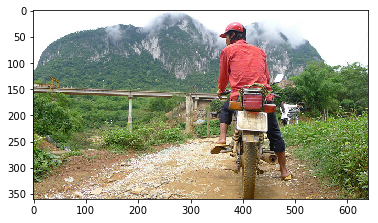

In [16]:
img, target = coco_captions[0]
print(img.size())
visual_img = transforms.ToPILImage()(img)
plt.imshow(visual_img)
print(target)

#### COCO Detection

In [18]:
%%time
coco_detections = dset.CocoDetection(
    root="../data/coco/train2017/",
    annFile="../data/coco/annotations/person_keypoints_train2017.json",
    transform=transforms.ToTensor())
print(len(coco_detections))

loading annotations into memory...
Done (t=10.23s)
creating index...
index created!
118287
CPU times: user 10 s, sys: 1.43 s, total: 11.4 s
Wall time: 11.4 s


[{'segmentation': [[352.55, 146.82, 353.61, 137.66, 356.07, 112.66, 357.13, 94.7, 357.13, 84.49, 363.12, 73.92, 370.16, 68.64, 370.16, 66.53, 368.4, 63.71, 368.05, 54.56, 361, 53.85, 356.07, 50.33, 356.43, 46.46, 364.17, 42.23, 369.1, 35.89, 371.22, 30.96, 376.85, 26.39, 383.54, 22.16, 391.29, 23.22, 400.79, 27.79, 402.2, 30.61, 404.32, 34.84, 406.08, 38.71, 406.08, 41.53, 406.08, 47.87, 407.84, 54.91, 408.89, 59.84, 408.89, 61.25, 408.89, 63.36, 422.28, 67.94, 432.13, 72.52, 445.87, 81.32, 446.57, 84.14, 446.57, 99.2, 451.15, 118.22, 453.26, 128.39, 453.61, 131.92, 453.61, 133.68, 451.5, 137.55, 451.5, 139.31, 455.38, 144.24, 455.38, 153.04, 455.73, 155.16, 461.01, 162.85, 462.07, 166.37, 459.95, 170.6, 459.6, 176.58, 459.95, 178.69, 459.95, 180.1, 448.33, 180.45, 447.98, 177.64, 446.57, 172.36, 447.63, 166.37, 449.74, 160.38, 450.09, 157.57, 448.68, 152.28, 445.16, 147.71, 441.29, 143.48, 435.66, 142.78, 428.26, 141.37, 420.87, 141.37, 418.75, 141.37, 411.71, 144.19, 404.32, 145.24, 

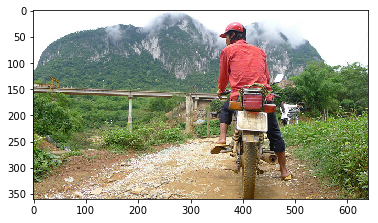

In [20]:
img, target = coco_detections[0]
plt.imshow(transforms.ToPILImage()(img))
print(target)

### Fashion MNIST
- it is in the master branch of torchvision, but not with the latest release 0.1.9 yet\
- see [example reader code](https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py) 

In [52]:
fashion_images = np.frombuffer(
    open("../data/fashion-mnist/train-images-idx3-ubyte", "rb").read(),
    dtype=np.uint8, offset=16).reshape((-1, 28, 28))
fashion_labels = np.frombuffer(
    open("../data/fashion-mnist/train-labels-idx1-ubyte", "rb").read(),
    dtype=np.uint8, offset=8)
label2name = dict(zip(range(10), 
                      ["T-shirt/top",
                      "Trouser",
                      "Pullover",
                      "Dress",
                      "Coat",
                      "Sandal",
                      "Shirt",
                      "Sneaker",
                      "Bag",
                      "Ankle boot"]))
name2label = {v:k for k,v in label2name.items()}

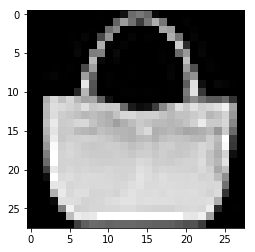

In [53]:
plt.imshow(a[100], cmap=plt.cm.gray)

In [54]:
fashion_labels.shape, label2name.get(fashion_labels[100])

((60000,), 'Bag')

### General image dataset with each organized in a subfolder
- folder structure:
```
root/A/xx.jpg
root/A/xy.jpg
root/B/001.jpg
root/B/what.jpg
```
- example http://vis-www.cs.umass.edu/lfw/#download

In [62]:
%%time
lfw_dset = dset.ImageFolder("../data/lfw/lfw/",
                            transform=transforms.ToTensor())
len(lfw_dset)

CPU times: user 128 ms, sys: 64 ms, total: 192 ms
Wall time: 191 ms


In [61]:
lfw_dset.classes[:5], list(lfw_dset.class_to_idx.items())[:5]

(['AJ_Cook', 'AJ_Lamas', 'Aaron_Eckhart', 'Aaron_Guiel', 'Aaron_Patterson'],
 [('AJ_Cook', 0),
  ('AJ_Lamas', 1),
  ('Aaron_Eckhart', 2),
  ('Aaron_Guiel', 3),
  ('Aaron_Patterson', 4)])

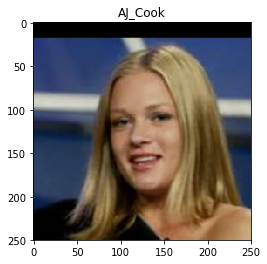

In [63]:
img, target = lfw_dset[0]
plt.imshow(transforms.ToPILImage()(img))
plt.title(lfw_dset.classes[target])

## Models
- AlexNet: AlexNet variant from the "One weird trick" paper.
- VGG: VGG-11, VGG-13, VGG-16, VGG-19 (with and without batch normalization)
- ResNet: ResNet-18, ResNet-34, ResNet-50, ResNet-101, ResNet-152
- SqueezeNet: SqueezeNet 1.0, and SqueezeNet 1.1
- DenseNet: DenseNet-128, DenseNet-169, DenseNet-201 and DenseNet-161
- Inception v3 : Inception v3

### preprocessing
- All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224.

- The images have to be loaded in to a range of [0, 1] and then normalized using mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225]

In [67]:
import torchvision.models as models
# model with random weights
sqznet = models.squeezenet1_1()
sqznet

SqueezeNet (
  (features): Sequential (
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU (inplace)
    (2): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (3): Fire (
      (squeeze): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU (inplace)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU (inplace)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU (inplace)
    )
    (4): Fire (
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU (inplace)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU (inplace)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU (inplace)
    )
    (5): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1,

In [124]:
## pretrained model
sqznet = models.squeezenet1_1(pretrained=True).cuda()
preprocess = transforms.Compose([
    transforms.Scale([224, 224]),
#     transforms.CenterCrop([224, 224]),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [125]:
from PIL import Image
import torch
from torch.autograd import Variable

img = Image.open("../data/coco/train2017/000000000064.jpg")
t = torch.unsqueeze(preprocess(img), 0)
x = Variable(t).cuda()
y = sqznet(x)
_, label = torch.max(y, dim=1)

In [126]:
x.size(), y.size(), label

(torch.Size([1, 3, 224, 224]), torch.Size([1, 1000]), Variable containing:
  409
 [torch.cuda.LongTensor of size 1 (GPU 0)])

In [127]:
from urllib.request import urlopen
synset_words = urlopen("https://raw.githubusercontent.com/dolaameng/data/master/synset_words.txt").readlines()
class2name = [line.decode('utf-8').strip().split(" ", 1)[1] for line in synset_words]

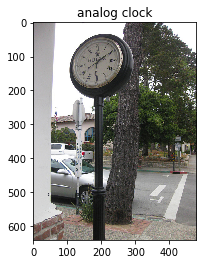

In [128]:
title = class2name[label.data[0]]
plt.imshow(img)
plt.title(title)